Базова модель:
Навчальна MSE: 0.5179331255246699, R^2: 0.6125511913966952
Тестова MSE: 0.5558915986952444, R^2: 0.5757877060324508
Модель може бути перенавчена.


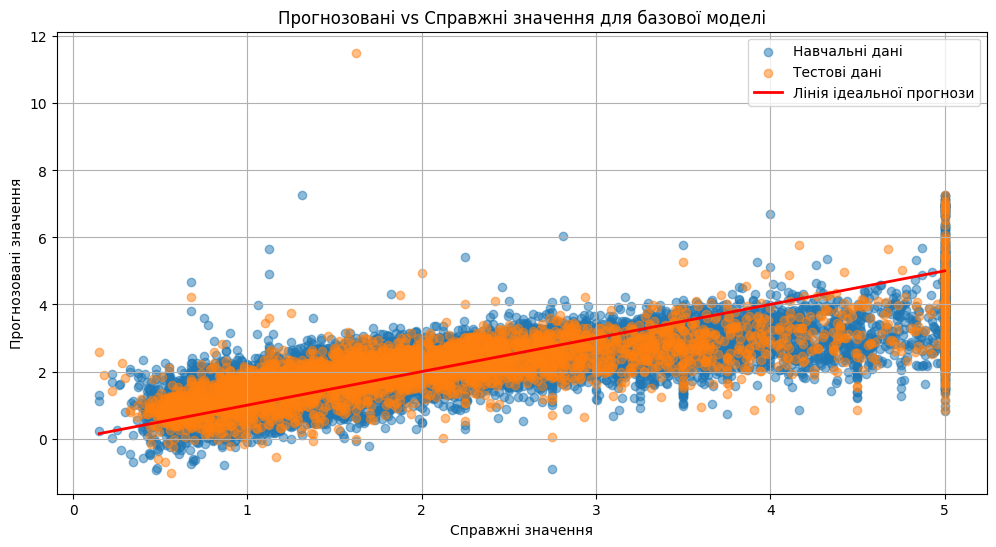


Ridge Regression:
Навчальна MSE: 0.5179332149226819, R^2: 0.6125511245209703
Тестова MSE: 0.5558034669932211, R^2: 0.5758549611440126


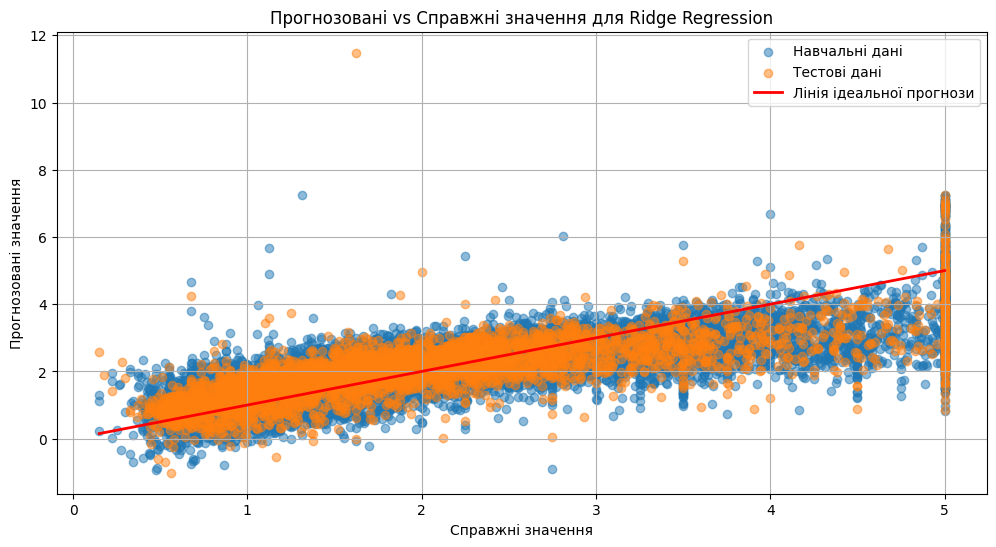


Lasso Regression:
Навчальна MSE: 0.60300014172392, R^2: 0.5489153425707493
Тестова MSE: 0.6135115198058131, R^2: 0.5318167610318159


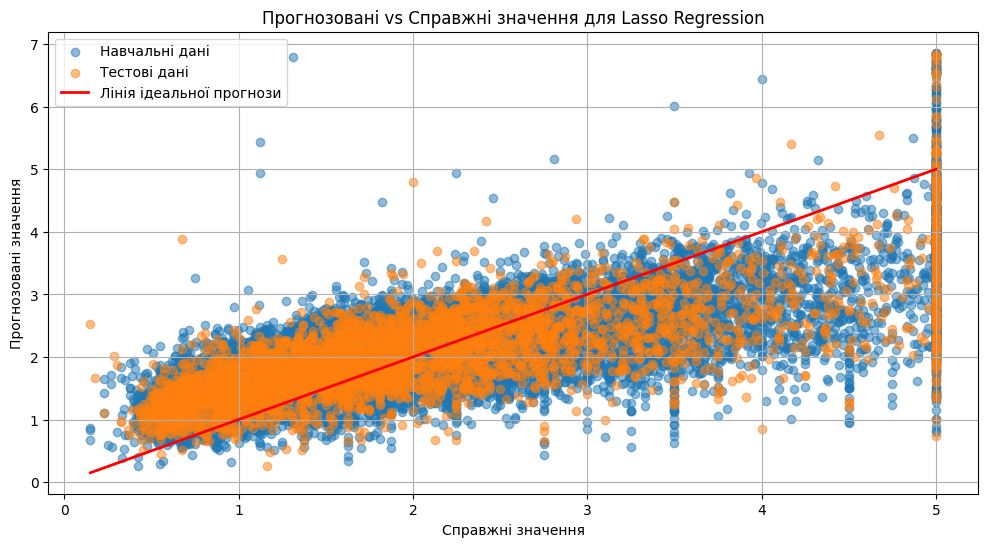

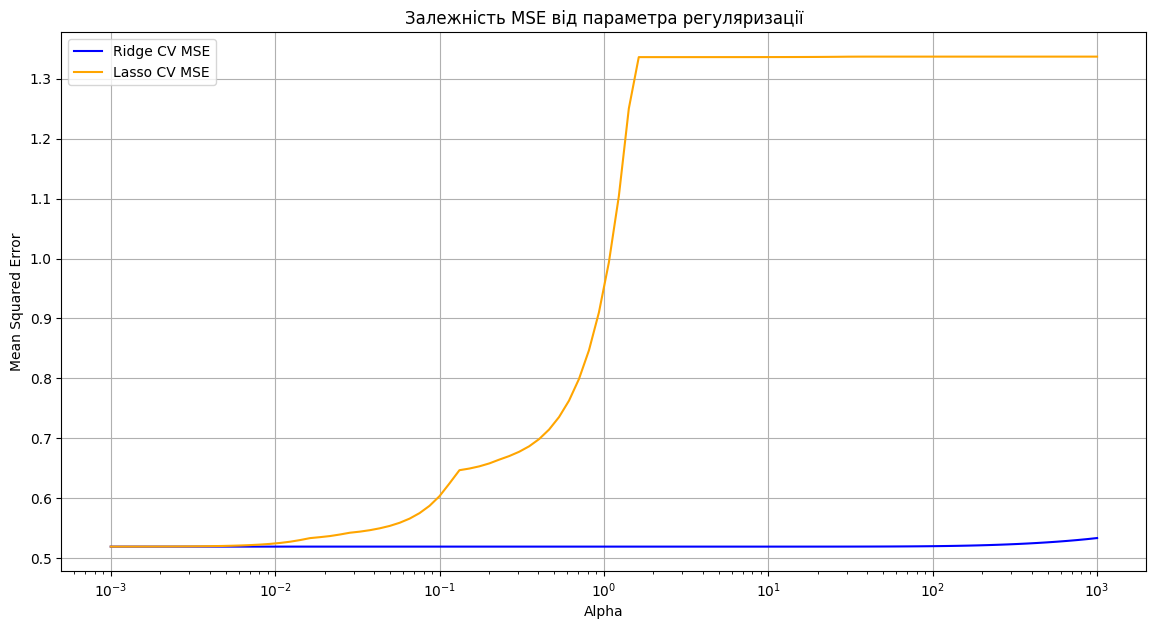


Звіт:
Регуляризація допомогла зменшити перенавчання, що підтверджується меншими значеннями MSE на тестових даних.
Оптимальні значення параметра регуляризації були знайдені за допомогою крос-валідації, що дозволяє вибрати найбільш ефективну модель.


In [2]:
# Імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 1. Завантаження та підготовка даних
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Розділяємо дані на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Побудова базової лінійної регресійної моделі
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Оцінка точності моделі
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Базова модель:")
print(f"Навчальна MSE: {train_mse}, R^2: {train_r2}")
print(f"Тестова MSE: {test_mse}, R^2: {test_r2}")

# 3. Аналіз перенавчання
if train_mse < test_mse:
    print("Модель може бути перенавчена.")
else:
    print("Модель не має ознак перенавчання.")

# Візуалізація результатів базової моделі
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Навчальні дані')
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Тестові дані')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Лінія ідеальної прогнози')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Справжні значення для базової моделі')
plt.legend()
plt.grid()
plt.show()

# 4. Запобігання перенавчанню: L2 регуляризація (Ridge Regression)
ridge_model = Ridge(alpha=1.0)  # Задаємо значення параметра регуляризації
ridge_model.fit(X_train, y_train)

# Оцінка точності моделі
y_train_ridge_pred = ridge_model.predict(X_train)
y_test_ridge_pred = ridge_model.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, y_train_ridge_pred)
ridge_test_mse = mean_squared_error(y_test, y_test_ridge_pred)

print("\nRidge Regression:")
print(f"Навчальна MSE: {ridge_train_mse}, R^2: {r2_score(y_train, y_train_ridge_pred)}")
print(f"Тестова MSE: {ridge_test_mse}, R^2: {r2_score(y_test, y_test_ridge_pred)}")

# Візуалізація результатів Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_ridge_pred, alpha=0.5, label='Навчальні дані')
plt.scatter(y_test, y_test_ridge_pred, alpha=0.5, label='Тестові дані')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Лінія ідеальної прогнози')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Справжні значення для Ridge Regression')
plt.legend()
plt.grid()
plt.show()

# L1 регуляризація (Lasso Regression)
lasso_model = Lasso(alpha=0.1)  # Задаємо значення параметра регуляризації
lasso_model.fit(X_train, y_train)

# Оцінка точності моделі
y_train_lasso_pred = lasso_model.predict(X_train)
y_test_lasso_pred = lasso_model.predict(X_test)

lasso_train_mse = mean_squared_error(y_train, y_train_lasso_pred)
lasso_test_mse = mean_squared_error(y_test, y_test_lasso_pred)

print("\nLasso Regression:")
print(f"Навчальна MSE: {lasso_train_mse}, R^2: {r2_score(y_train, y_train_lasso_pred)}")
print(f"Тестова MSE: {lasso_test_mse}, R^2: {r2_score(y_test, y_test_lasso_pred)}")

# Візуалізація результатів Lasso Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_lasso_pred, alpha=0.5, label='Навчальні дані')
plt.scatter(y_test, y_test_lasso_pred, alpha=0.5, label='Тестові дані')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Лінія ідеальної прогнози')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Справжні значення для Lasso Regression')
plt.legend()
plt.grid()
plt.show()

# 5. Крос-валідація для вибору оптимального значення регуляризації
alphas = np.logspace(-3, 3, 100)
ridge_cv_scores = []
lasso_cv_scores = []

for alpha in alphas:
    ridge_model_cv = Ridge(alpha=alpha)
    lasso_model_cv = Lasso(alpha=alpha)

    ridge_cv_score = cross_val_score(ridge_model_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_score = cross_val_score(lasso_model_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    ridge_cv_scores.append(-ridge_cv_score.mean())
    lasso_cv_scores.append(-lasso_cv_score.mean())

# Візуалізація результатів крос-валідації
plt.figure(figsize=(14, 7))
plt.plot(alphas, ridge_cv_scores, label='Ridge CV MSE', color='blue')
plt.plot(alphas, lasso_cv_scores, label='Lasso CV MSE', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Залежність MSE від параметра регуляризації')
plt.legend()
plt.grid()
plt.show()

# 6. Підготовка звіту
print("\nЗвіт:")
print("Регуляризація допомогла зменшити перенавчання, що підтверджується меншими значеннями MSE на тестових даних.")
print("Оптимальні значення параметра регуляризації були знайдені за допомогою крос-валідації, що дозволяє вибрати найбільш ефективну модель.")
